Number of epochs needed for convergence:  264


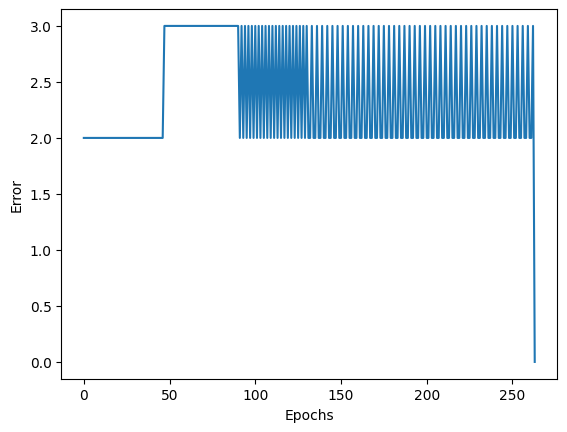

In [16]:
## A1
import numpy as np
import matplotlib.pyplot as plt
def step_activation_function(x):
    if x >= 0:
        return 1
    else:
        return 0
WO = 10
W1 = 0.2
w2 = -0.75
a = 0.05
inputs = np.array([[0, 1],
                   [1, 1],
                   [1, 0]])
outputs = np.array([0, 1, 0])
errors = []
for i in range(1000):
    error = 0
    for j in range(len(inputs)):
        x = W1 * inputs[j][0] + w2 * inputs[j][1] + WO
        y = step_activation_function(x)
        e = outputs[j] - y
        error += e**2
        W1 += a * e * inputs[j][0]
        w2 += a * e * inputs[j][1]
        WO += a * e
    errors.append(error)
    if error <= 0.002:
        break
print("Number of epochs needed for convergence: ", i+1)
plt.plot(range(len(errors)), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


Converged after 201 epochs.
Did not converge after 1000 epochs.
Converged after 38 epochs.


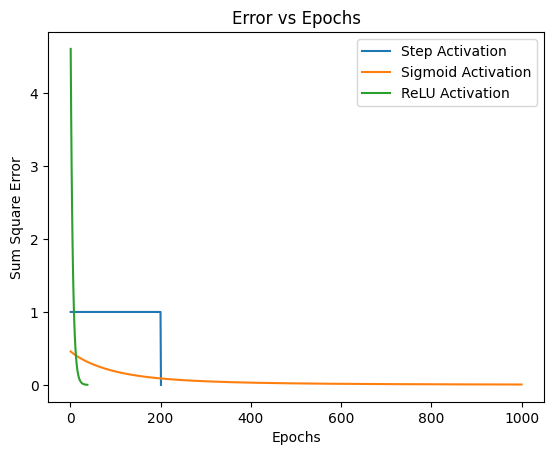

Final Weights (Step Activation): [-3.76340138  4.80255918 -0.75      ]
Final Weights (Sigmoid Activation): [-3.76340138  4.80255918 -0.75      ]
Final Weights (ReLU Activation): [-3.76340138  4.80255918 -0.75      ]


In [17]:
## A2
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu_activation(x):
    return np.maximum(0, x)

# Perceptron function
def perceptron_predict(inputs, weights, activation_func):
    # Calculate weighted sum
    weighted_sum = np.dot(inputs, weights)
    # Apply activation function
    return activation_func(weighted_sum)

# Training function
def train_perceptron(inputs, targets, weights, activation_func, learning_rate, max_epochs):
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            prediction = perceptron_predict(input_vector, weights, activation_func)
            error = target - prediction
            total_error += error ** 2
            weights += learning_rate * error * input_vector
        errors.append(total_error)
        if total_error <= 0.002:
            print("Converged after", epoch+1, "epochs.")
            break
        elif epoch == max_epochs - 1:
            print("Did not converge after", max_epochs, "epochs.")
    return weights, errors

# Provided initial weights
initial_weights = np.array([10, 0.2, -0.75])

# Training data (extracted from your provided dataset)
inputs = np.array([
    [1, 0, 0],  # A1, A2, A3
    [1, 1, 0]   # A1, A2, A3
])
targets = np.array([0, 1])  # Output for AND gate

# Parameters
learning_rate = 0.05
max_epochs = 1000

# Train perceptron with step activation
final_weights_step, errors_step = train_perceptron(inputs, targets, initial_weights, step_activation, learning_rate, max_epochs)

# Train perceptron with sigmoid activation
final_weights_sigmoid, errors_sigmoid = train_perceptron(inputs, targets, initial_weights, sigmoid_activation, learning_rate, max_epochs)

# Train perceptron with ReLU activation
final_weights_relu, errors_relu = train_perceptron(inputs, targets, initial_weights, relu_activation, learning_rate, max_epochs)

# Plot error values
plt.plot(range(1, len(errors_step)+1), errors_step, label='Step Activation')
plt.plot(range(1, len(errors_sigmoid)+1), errors_sigmoid, label='Sigmoid Activation')
plt.plot(range(1, len(errors_relu)+1), errors_relu, label='ReLU Activation')
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()

print("Final Weights (Step Activation):", final_weights_step)
print("Final Weights (Sigmoid Activation):", final_weights_sigmoid)
print("Final Weights (ReLU Activation):", final_weights_relu)



Learning Rate: 0.1
Converged after 102 epochs.

Learning Rate: 0.2
Converged after 52 epochs.

Learning Rate: 0.3
Converged after 36 epochs.

Learning Rate: 0.4
Converged after 26 epochs.

Learning Rate: 0.5
Converged after 23 epochs.

Learning Rate: 0.6
Converged after 18 epochs.

Learning Rate: 0.7
Converged after 17 epochs.

Learning Rate: 0.8
Converged after 15 epochs.

Learning Rate: 0.9
Converged after 14 epochs.

Learning Rate: 1
Converged after 13 epochs.


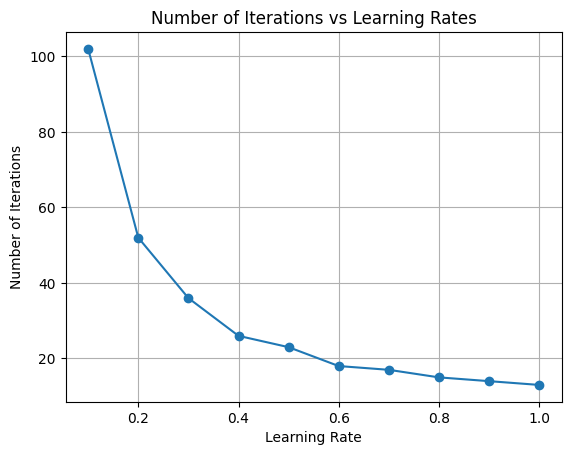

In [5]:
## A3
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron function
def perceptron_predict(inputs, weights):
    # Calculate weighted sum
    weighted_sum = np.dot(inputs, weights)
    # Apply activation function
    return step_activation(weighted_sum)

# Training function
def train_perceptron(inputs, targets, weights, learning_rate, max_epochs):
    for epoch in range(max_epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            prediction = perceptron_predict(input_vector, weights)
            error = target - prediction
            total_error += error ** 2
            weights += learning_rate * error * input_vector
        if total_error <= 0.002:
            print("Converged after", epoch+1, "epochs.")
            break
        elif epoch == max_epochs - 1:
            print("Did not converge after", max_epochs, "epochs.")
    return epoch+1  # Return the number of epochs taken for convergence

# Provided initial weights
initial_weights = np.array([10, 0.2, -0.75])

# Training data (extracted from your provided dataset)
inputs = np.array([
    [1, 0, 0],  # A1, A2, A3
    [1, 1, 0]   # A1, A2, A3
])
targets = np.array([0, 1])  # Output for AND gate

# Parameters
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
max_epochs = 1000

# List to store number of epochs taken for convergence for each learning rate
epochs_taken = []

# Train perceptron for each learning rate
for learning_rate in learning_rates:
    print("\nLearning Rate:", learning_rate)
    final_weights = initial_weights.copy()
    epochs = train_perceptron(inputs, targets, final_weights, learning_rate, max_epochs)
    epochs_taken.append(epochs)

# Plot number of iterations vs learning rates
plt.plot(learning_rates, epochs_taken, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Learning Rates')
plt.grid(True)
plt.show()


Did not converge after 1000 epochs.


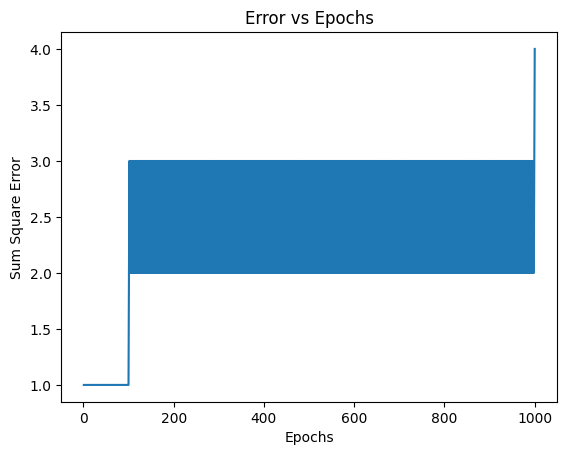

Final Weights: [ 7.64666108e-15  5.00000000e-02 -1.49755208e-13]


In [13]:
## A4.1
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron function
def perceptron_predict(inputs, weights):
    # Calculate weighted sum
    weighted_sum = np.dot(inputs, weights)
    # Apply activation function
    return step_activation(weighted_sum)

# Training function
def train_perceptron(inputs, targets, weights, learning_rate, max_epochs):
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            prediction = perceptron_predict(input_vector, weights)
            error = target - prediction
            total_error += error ** 2
            weights += learning_rate * error * input_vector.astype(weights.dtype)
        errors.append(total_error)
        if total_error <= 0.002:
            print("Converged after", epoch+1, "epochs.")
            break
        elif epoch == max_epochs - 1:
            print("Did not converge after", max_epochs, "epochs.")
    return weights, errors

# Provided initial weights for XOR gate
initial_weights = np.array([-10, 20, 20], dtype=float)

# XOR gate truth table
inputs = np.array([
    [1, 0, 0],  # A1, A2, A3
    [1, 1, 0],  # A1, A2, A3
    [1, 0, 1],  # A1, A2, A3
    [1, 1, 1]   # A1, A2, A3
])
targets = np.array([0, 1, 1, 0], dtype=float)  # Output for XOR gate

# Parameters
learning_rate = 0.05
max_epochs = 1000

# Train perceptron
final_weights, errors = train_perceptron(inputs, targets, initial_weights, learning_rate, max_epochs)

# Plot error values
plt.plot(range(1, len(errors)+1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Error vs Epochs')
plt.show()

print("Final Weights:", final_weights)


Did not converge after 1000 epochs.
Did not converge after 1000 epochs.
Did not converge after 1000 epochs.


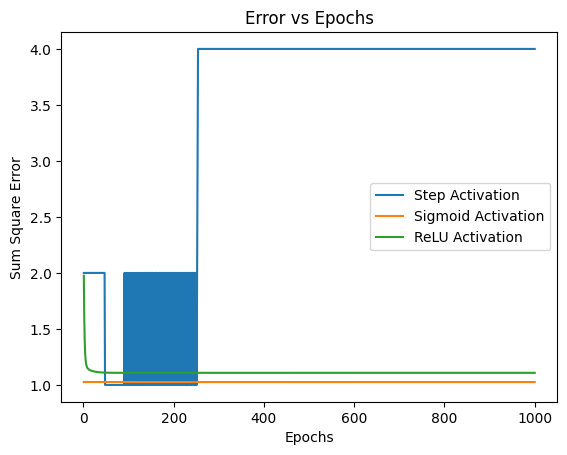

Final Weights (Step Activation): [ 0.52631579 -0.02631579 -0.05263158]
Final Weights (Sigmoid Activation): [ 0.52631579 -0.02631579 -0.05263158]
Final Weights (ReLU Activation): [ 0.52631579 -0.02631579 -0.05263158]


In [15]:
## A4.2
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu_activation(x):
    return np.maximum(0, x)

# Perceptron function
def perceptron_predict(inputs, weights, activation_func):
    # Calculate weighted sum
    weighted_sum = np.dot(inputs, weights)
    # Apply activation function
    return activation_func(weighted_sum)

# Training function
def train_perceptron(inputs, targets, weights, activation_func, learning_rate, max_epochs):
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            prediction = perceptron_predict(input_vector, weights, activation_func)
            error = target - prediction
            total_error += error ** 2
            weights += learning_rate * error * input_vector.astype(weights.dtype)
        errors.append(total_error)
        if total_error <= 0.002:
            print("Converged after", epoch+1, "epochs.")
            break
        elif epoch == max_epochs - 1:
            print("Did not converge after", max_epochs, "epochs.")
    return weights, errors

# Provided initial weights
initial_weights = np.array([10, 0.2, -0.75])

# Training data for XOR gate
inputs_xor = np.array([
    [1, 0, 0],  # A1, A2, A3
    [1, 1, 0],  # A1, A2, A3
    [1, 0, 1],  # A1, A2, A3
    [1, 1, 1]   # A1, A2, A3
])
targets_xor = np.array([0, 1, 1, 0])  # Output for XOR gate

# Parameters
learning_rate = 0.05
max_epochs = 1000

# Train perceptron with step activation
final_weights_step, errors_step = train_perceptron(inputs_xor, targets_xor, initial_weights, step_activation, learning_rate, max_epochs)

# Train perceptron with sigmoid activation
final_weights_sigmoid, errors_sigmoid = train_perceptron(inputs_xor, targets_xor, initial_weights, sigmoid_activation, learning_rate, max_epochs)

# Train perceptron with ReLU activation
final_weights_relu, errors_relu = train_perceptron(inputs_xor, targets_xor, initial_weights, relu_activation, learning_rate, max_epochs)

# Plot error values
plt.plot(range(1, len(errors_step)+1), errors_step, label='Step Activation')
plt.plot(range(1, len(errors_sigmoid)+1), errors_sigmoid, label='Sigmoid Activation')
plt.plot(range(1, len(errors_relu)+1), errors_relu, label='ReLU Activation')
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()

print("Final Weights (Step Activation):", final_weights_step)
print("Final Weights (Sigmoid Activation):", final_weights_sigmoid)
print("Final Weights (ReLU Activation):", final_weights_relu)



Learning Rate: 0.1
Did not converge after 1000 epochs.

Learning Rate: 0.2
Did not converge after 1000 epochs.

Learning Rate: 0.3
Did not converge after 1000 epochs.

Learning Rate: 0.4
Did not converge after 1000 epochs.

Learning Rate: 0.5
Did not converge after 1000 epochs.

Learning Rate: 0.6
Did not converge after 1000 epochs.

Learning Rate: 0.7
Did not converge after 1000 epochs.

Learning Rate: 0.8
Did not converge after 1000 epochs.

Learning Rate: 0.9
Did not converge after 1000 epochs.

Learning Rate: 1
Did not converge after 1000 epochs.


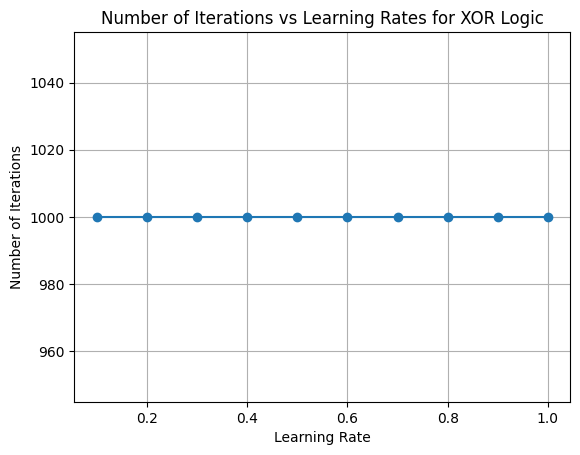

In [24]:
## A4.3
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron function
def perceptron_predict(inputs, weights):
    # Calculate weighted sum
    weighted_sum = np.dot(inputs, weights)
    # Apply activation function
    return step_activation(weighted_sum)

# Training function
def train_perceptron(inputs, targets, weights, learning_rate, max_epochs):
    for epoch in range(max_epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            prediction = perceptron_predict(input_vector, weights)
            error = target - prediction
            total_error += error ** 2
            weights += learning_rate * error * input_vector
        if total_error == 0:
            print("Converged after", epoch+1, "epochs.")
            break
        elif epoch == max_epochs - 1:
            print("Did not converge after", max_epochs, "epochs.")
    return epoch+1  # Return the number of epochs taken for convergence

# Provided initial weights
initial_weights = np.array([10, 0.2, -0.75])

# Training data for XOR logic
inputs = np.array([
    [1, 0, 0],  # A1, A2, A3
    [1, 1, 0],  # A1, A2, A3
    [1, 0, 1],  # A1, A2, A3
    [1, 1, 1]   # A1, A2, A3
])
targets = np.array([0, 1, 1, 0])  # Output for XOR gate

# Parameters
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
max_epochs = 1000

# List to store number of epochs taken for convergence for each learning rate
epochs_taken = []

# Train perceptron for each learning rate
for learning_rate in learning_rates:
    print("\nLearning Rate:", learning_rate)
    final_weights = initial_weights.copy()
    epochs = train_perceptron(inputs, targets, final_weights, learning_rate, max_epochs)
    epochs_taken.append(epochs)

# Plot number of iterations vs learning rates
plt.plot(learning_rates, epochs_taken, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Learning Rates for XOR Logic')
plt.grid(True)
plt.show()


In [27]:
## A5
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Perceptron function
def perceptron_predict(inputs, weights):
    # Calculate weighted sum
    weighted_sum = np.dot(inputs, weights)
    # Apply sigmoid activation function
    return sigmoid(weighted_sum)

# Training function
def train_perceptron(inputs, targets, weights, learning_rate, max_epochs):
    for epoch in range(max_epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            prediction = perceptron_predict(input_vector, weights)
            error = target - prediction
            total_error += abs(error)
            weights += learning_rate * error * input_vector * prediction * (1 - prediction)  # Update rule with derivative of sigmoid
        if total_error == 0:
            print("Converged after", epoch+1, "epochs.")
            break
        elif epoch == max_epochs - 1:
            print("Did not converge after", max_epochs, "epochs.")
    return weights

# Customer data
customer_data = np.array([
    [20, 6, 23, 86, 1],    # Features: Candies, Mangoes, Milk Packets, Payment; High Value Tx? (1: Yes, 0: No)
    [16, 36, 28, 9, 1],
    [27, 6, 23, 93, 1],
    [19, 12, 11, 0, 0],
    [24, 42, 28, 0, 1],
    [22, 15, 16, 7, 0],
    [15, 42, 27, 1, 1],
    [18, 42, 27, 4, 1],
    [21, 14, 14, 8, 0],
    [16, 24, 19, 8, 0]
])

# Separate features and target variable
inputs = customer_data[:, :-1]  # Features
targets = customer_data[:, -1]  # High Value Tx?

# Add bias term to inputs
inputs = np.c_[np.ones(len(inputs)), inputs]

# Initialize weights (including bias)
initial_weights = np.random.rand(inputs.shape[1])

# Parameters
learning_rate = 0.01
max_epochs = 1000

# Train the perceptron
final_weights = train_perceptron(inputs, targets, initial_weights, learning_rate, max_epochs)

print("Final Weights:", final_weights)


Did not converge after 1000 epochs.
Final Weights: [0.79932008 0.60194783 0.62679342 0.94127408 0.21113269]


In [28]:
## A6
import numpy as np

# Customer data
customer_data = np.array([
    [20, 6, 23, 86, 1],    # Features: Candies, Mangoes, Milk Packets, Payment; High Value Tx? (1: Yes, 0: No)
    [16, 36, 28, 9, 1],
    [27, 6, 23, 93, 1],
    [19, 12, 11, 0, 0],
    [24, 42, 28, 0, 1],
    [22, 15, 16, 7, 0],
    [15, 42, 27, 1, 1],
    [18, 42, 27, 4, 1],
    [21, 14, 14, 8, 0],
    [16, 24, 19, 8, 0]
])

# Separate features and target variable
inputs = customer_data[:, :-1]  # Features
targets = customer_data[:, -1]  # High Value Tx?

# Add bias term to inputs
inputs = np.c_[np.ones(len(inputs)), inputs]

# Matrix pseudo-inverse method
weights_pseudo_inverse = np.linalg.pinv(inputs).dot(targets)

print("Weights obtained from matrix pseudo-inverse method:", weights_pseudo_inverse)


Weights obtained from matrix pseudo-inverse method: [-0.95171427  0.00570276  0.02279955  0.0306654   0.01071841]


In [29]:
## A7
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize weights and biases
np.random.seed(42)
input_neurons = 2
hidden_neurons = 2
output_neurons = 1
weights_input_hidden = np.random.rand(input_neurons, hidden_neurons)
weights_hidden_output = np.random.rand(hidden_neurons, output_neurons)
bias_hidden = np.random.rand(1, hidden_neurons)
bias_output = np.random.rand(1, output_neurons)

# AND gate training data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [0], [0], [1]])

# Parameters
learning_rate = 0.05
max_iterations = 1000
convergence_error = 0.002

# Training loop
for i in range(max_iterations):
    # Forward propagation
    hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output = np.dot(hidden_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output)
    
    # Calculate error
    error = targets - predicted_output
    mean_error = np.mean(np.abs(error))
    
    if mean_error <= convergence_error:
        print(f"Converged after {i+1} iterations.")
        break
    
    # Backpropagation
    output_delta = error * sigmoid_derivative(output)
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_input)
    
    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

    if i == max_iterations - 1:
        print("Did not converge after 1000 iterations.")

# Test the trained model
print("Test Results:")
for i in range(len(inputs)):
    hidden_input = np.dot(inputs[i], weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output = np.dot(hidden_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output)
    print(f"Input: {inputs[i]}, Predicted Output: {predicted_output}, Actual Output: {targets[i]}")


Did not converge after 1000 iterations.
Test Results:
Input: [0 0], Predicted Output: [[0.26507578]], Actual Output: [0]
Input: [0 1], Predicted Output: [[0.26911227]], Actual Output: [0]
Input: [1 0], Predicted Output: [[0.26274352]], Actual Output: [0]
Input: [1 1], Predicted Output: [[0.26815401]], Actual Output: [1]


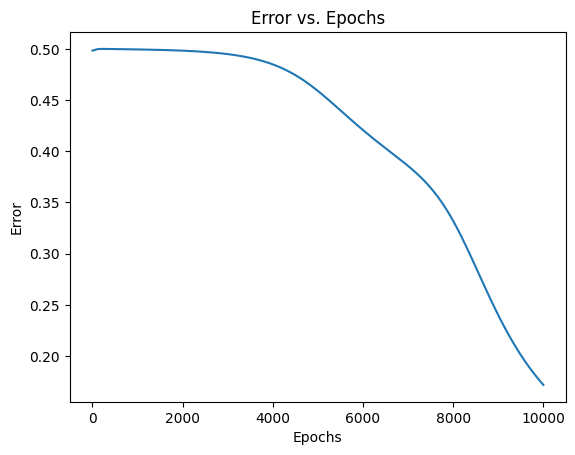

In [30]:
## A8
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
np.random.seed(0)
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.05

# Weights and biases for the hidden layer
hidden_weights = np.random.uniform(size=(input_size, hidden_size))
hidden_bias = np.random.uniform(size=(1, hidden_size))

# Weights and biases for the output layer
output_weights = np.random.uniform(size=(hidden_size, output_size))
output_bias = np.random.uniform(size=(1, output_size))

# Training data for XOR gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

# Training loop
errors = []
for epoch in range(10000):
    # Forward propagation
    hidden_layer_input = np.dot(inputs, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)
    
    # Calculate error
    error = outputs - predicted_output
    errors.append(np.mean(np.abs(error)))
    
    # Backpropagation
    output_delta = error * sigmoid_derivative(predicted_output)
    
    hidden_error = output_delta.dot(output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
    output_bias += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    
    hidden_weights += inputs.T.dot(hidden_delta) * learning_rate
    hidden_bias += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
    
    # Check for convergence
    if np.mean(np.abs(error)) <= 0.002:
        print("Converged after", epoch+1, "epochs.")
        break

# Plot the error during training
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()


Converged after 201 epochs.
Did not converge after 1000 epochs.
Converged after 81 epochs.


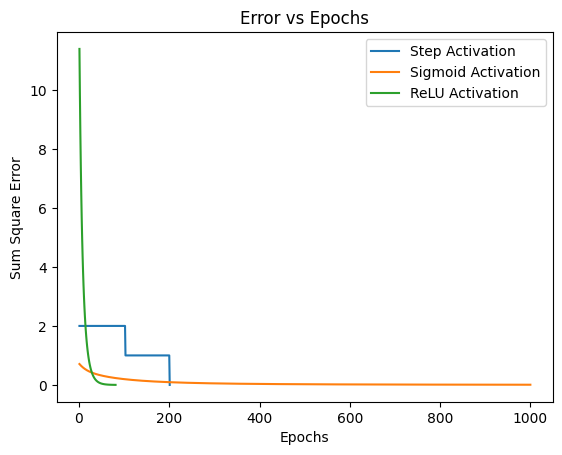

Final Weights (Step Activation):
 [[ 1.04086996 -7.5498092  -0.75      ]
 [-3.78276931  4.78319125 -0.75      ]]
Final Weights (Sigmoid Activation):
 [[ 1.04086996 -7.5498092  -0.75      ]
 [-3.78276931  4.78319125 -0.75      ]]
Final Weights (ReLU Activation):
 [[ 1.04086996 -7.5498092  -0.75      ]
 [-3.78276931  4.78319125 -0.75      ]]


In [33]:
## A9
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_activation(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu_activation(x):
    return np.maximum(0, x)

# Perceptron function
def perceptron_predict(inputs, weights, activation_func):
    # Calculate weighted sum
    weighted_sum = np.dot(inputs, weights.T)
    # Apply activation function
    return activation_func(weighted_sum)

# Training function
def train_perceptron(inputs, targets, weights, activation_func, learning_rate, max_epochs):
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            input_vector = np.expand_dims(input_vector, axis=0)  # Make it a row vector
            prediction = perceptron_predict(input_vector, weights, activation_func)
            error = target - prediction
            total_error += np.sum(error ** 2)
            weights += learning_rate * np.outer(error, input_vector)
        errors.append(total_error)
        if total_error <= 0.002:
            print("Converged after", epoch+1, "epochs.")
            break
        elif epoch == max_epochs - 1:
            print("Did not converge after", max_epochs, "epochs.")
    return weights, errors

# Provided initial weights
initial_weights = np.array([[10, 0.2, -0.75], [10, 0.2, -0.75]])

# Training data (extracted from your provided dataset)
inputs = np.array([
    [1, 0, 0],  # A1, A2, A3
    [1, 1, 0]   # A1, A2, A3
])
targets = np.array([[1, 0], [0, 1]])  # Output for AND gate

# Parameters
learning_rate = 0.05
max_epochs = 1000

# Train perceptron with step activation
final_weights_step, errors_step = train_perceptron(inputs, targets, initial_weights, step_activation, learning_rate, max_epochs)

# Train perceptron with sigmoid activation
final_weights_sigmoid, errors_sigmoid = train_perceptron(inputs, targets, initial_weights, sigmoid_activation, learning_rate, max_epochs)

# Train perceptron with ReLU activation
final_weights_relu, errors_relu = train_perceptron(inputs, targets, initial_weights, relu_activation, learning_rate, max_epochs)

# Plot error values
plt.plot(range(1, len(errors_step)+1), errors_step, label='Step Activation')
plt.plot(range(1, len(errors_sigmoid)+1), errors_sigmoid, label='Sigmoid Activation')
plt.plot(range(1, len(errors_relu)+1), errors_relu, label='ReLU Activation')
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()

print("Final Weights (Step Activation):\n", final_weights_step)
print("Final Weights (Sigmoid Activation):\n", final_weights_sigmoid)
print("Final Weights (ReLU Activation):\n", final_weights_relu)


In [35]:
## A10
from sklearn.neural_network import MLPClassifier
import numpy as np
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
and_classifier = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=10000)
and_classifier.fit(X_and, y_and)
xor_classifier = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=10000)
xor_classifier.fit(X_xor, y_xor)
print("AND gate predictions:", and_classifier.predict(X_and))
print("XOR gate predictions:", xor_classifier.predict(X_xor))


AND gate predictions: [0 0 0 1]
XOR gate predictions: [1 1 1 1]


In [ ]:
## A11
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv(r"C:\Users\hp\Desktop\jupyter projects\shrest\Toddler Autism dataset July 2018.csv")

# Assuming 'Class/ASD Traits' is your target variable
X = data.drop(columns=['Case_No', 'Class/ASD Traits'])
y = data['Class/ASD Traits']

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
# Here we assume a simple MLP with two hidden layers of 100 and 50 neurons respectively
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42))
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
